In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing price.csv')

In [3]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# exploring target variable - Sale Price



In [4]:
 df['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [5]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

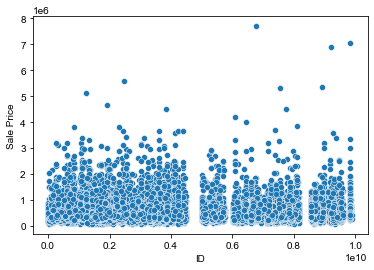

In [6]:
sns.scatterplot(x='ID',y = 'Sale Price',data = df)
sns.set(rc = {'figure.figsize':(10,5)})

In [7]:
q1 = df['Sale Price'].quantile(.25)
q3 = df['Sale Price'].quantile(.75)
print(q1,q3)
iqr = q3 - q1
print(iqr)

321950.0 645000.0
323050.0


In [8]:
upper_limit= q3 +  1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

<AxesSubplot:xlabel='Sale Price'>

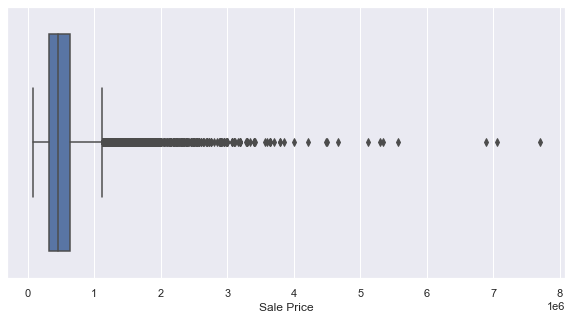

In [9]:
sns.boxplot(x = 'Sale Price',data = df)

In [10]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value< lower_limit:
        return lower_limit
    else :
        return value     

In [11]:
df['Sale Price'] = df['Sale Price'].apply(limit_imputer)

In [12]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Price'>

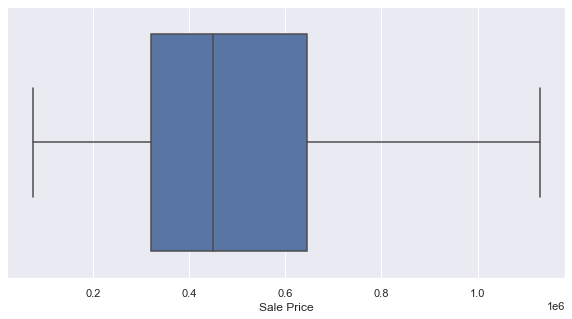

In [13]:
sns.boxplot(x = 'Sale Price',data = df)

In [14]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [15]:
df.dropna(subset = 'Sale Price',axis = 0,inplace = True)

In [16]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<AxesSubplot:xlabel='Sale Price', ylabel='Count'>

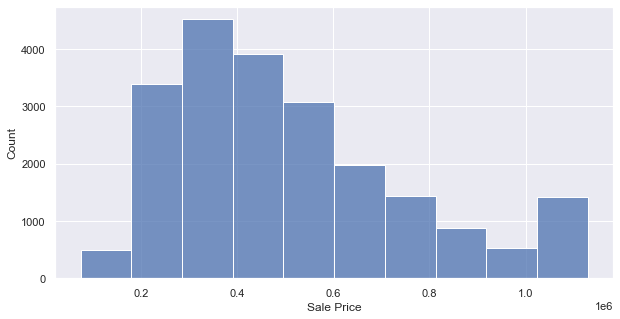

In [17]:
sns.histplot(x = 'Sale Price',bins = 10,data = df)

# Handling missing values for independent numerical variable

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [19]:
numerical_columns = ['Flat Area (in Sqft)','Lot Area (in Sqft)','No of Bathrooms','Latitude','Longitude',
                     'Living Area after Renovation (in Sqft)','Area of the House from Basement (in Sqft)'] 

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [23]:
column= df["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [24]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [25]:
df['Zipcode'] = imputer.fit_transform(column)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [27]:
df['Zipcode'] = df['Zipcode'].astype('object')

In [28]:
df['Zipcode'].dtype

dtype('O')

In [29]:
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [30]:
mapping = {'None':'0',
          'Once':'1',
          'Twice': '2',
          'Thrice':'3',
          'Four': '4'}

In [31]:
df['No of Times Visited']= df['No of Times Visited'].map(mapping)

In [32]:
df['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [33]:
df['Renovated Year'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [34]:
df['Ever Renovated'] = np.where(df['Renovated Year']==0,'No','Yes')

In [35]:
df['Ever Renovated'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Ever Renovated, dtype: object

In [36]:
df['Purchase Year'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [37]:
df['Purchase Year'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Purchase Year, dtype: int64

In [38]:
df['Year Since Renovation']= np.where(df['Ever Renovated']=='Yes',
                                     abs(df['Purchase Year'] - df['Renovated Year']),0)

In [39]:
df.drop(columns = ['Renovated Year','Date House was Sold','Purchase Year'],inplace = True)

In [40]:
df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'No of Times Visited', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Zipcode',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Ever Renovated',
       'Year Since Renovation'],
      dtype='object')

<AxesSubplot:xlabel='Ever Renovated', ylabel='Sale Price'>

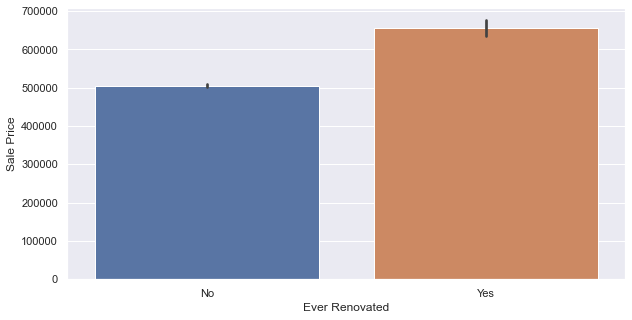

In [41]:
sns.barplot(x = 'Ever Renovated',y='Sale Price',data = df)

<AxesSubplot:xlabel='Year Since Renovation', ylabel='Sale Price'>

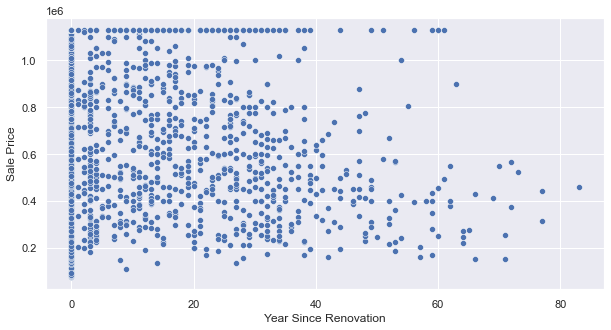

In [42]:
sns.scatterplot(x= 'Year Since Renovation',y = 'Sale Price',data = df)

<AxesSubplot:xlabel='Flat Area (in Sqft)', ylabel='Sale Price'>

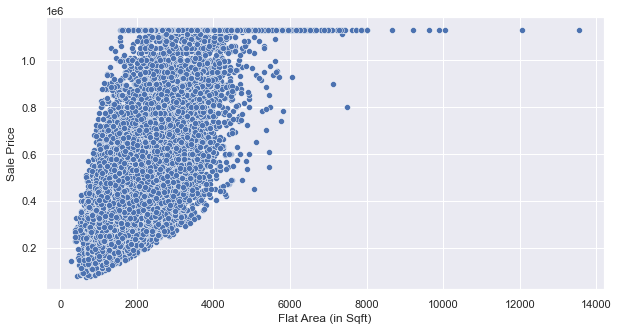

In [43]:
sns.scatterplot(x = 'Flat Area (in Sqft)',y = 'Sale Price',data = df)

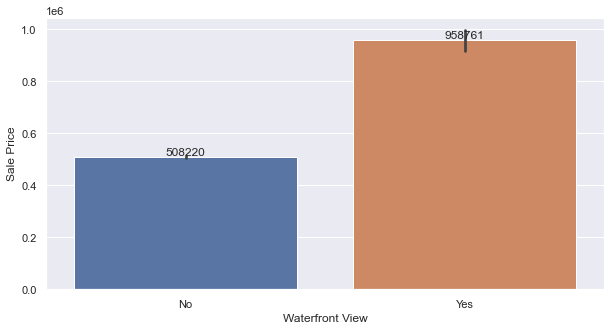

In [44]:
ax = sns.barplot(x = 'Waterfront View', y = 'Sale Price',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

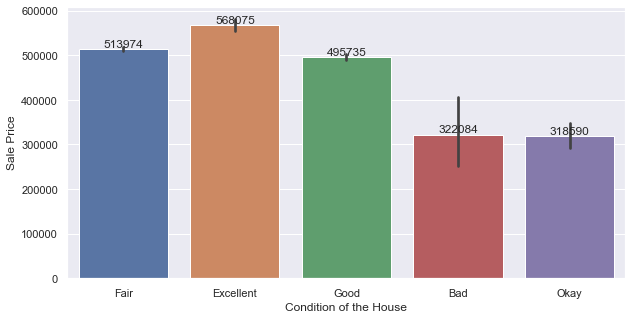

In [45]:
ax = sns.barplot(x = 'Condition of the House',y ='Sale Price',data = df)
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:>

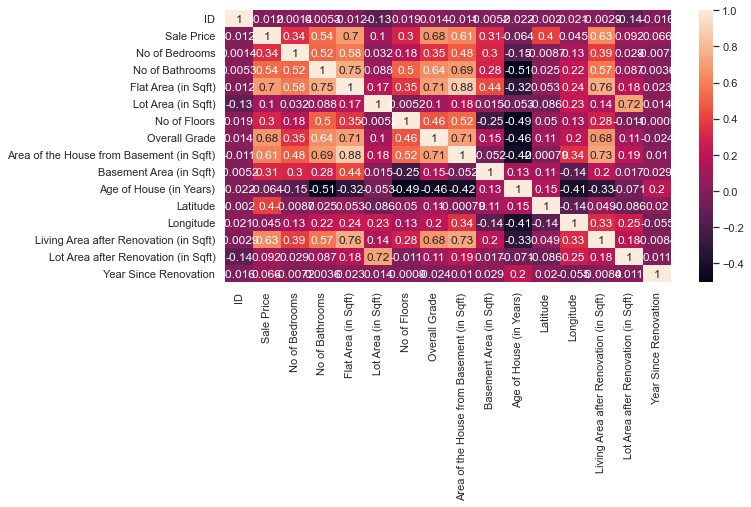

In [46]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='Zipcode', ylabel='Sale Price'>

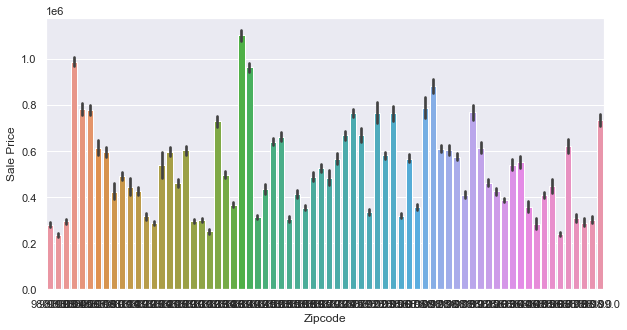

In [47]:
sns.barplot(x = 'Zipcode', y = 'Sale Price',data = df)

In [48]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [50]:
df = df.rename(columns = {'Sale Price':'Sale_Price'})

In [51]:
df = df.rename(columns = {'Waterfront View':'Waterfront_View'})

In [52]:
df = df.rename(columns = {'Condition of the House': 'Condition_of_the_House'})

In [53]:
df = df.rename(columns = {'Ever Renovated':'Ever_Renovated'})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront_View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition_of_the_House                     21609 non-null  object 
 10  Overall Grade         

In [55]:
mod = ols('Sale_Price ~ Condition_of_the_House',data = df).fit()

In [56]:
anova_table = sm.stats.anova_lm(mod,type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Condition_of_the_House,4.0,1.441831e+13,3.604579e+12,58.25563,5.447605e-49
Residual,21604.0,1.336752e+15,6.187520e+10,NaN,NaN


In [57]:
mod = ols ('Sale_Price ~ Ever_Renovated',data = df).fit()

In [58]:
anova_table = sm.stats.anova_lm(mod,type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Ever_Renovated,1.0,1.998463e+13,1.998463e+13,324.378469,5.419055e-72
Residual,21607.0,1.331185e+15,6.160899e+10,NaN,NaN


In [59]:
mod = ols('Sale_Price ~ Waterfront_View',data = df).fit()

In [60]:
anova_table = sm.stats.anova_lm(mod,type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Waterfront_View,1.0,3.283737e+13,3.283737e+13,538.192683,1.275558e-117
Residual,21607.0,1.318333e+15,6.101415e+10,NaN,NaN


In [61]:
df = pd.get_dummies(df,columns = ['Condition_of_the_House'],drop_first=True)

In [62]:
df= pd.get_dummies(df,columns = ['Ever_Renovated'],drop_first=True)

In [63]:
df = pd.get_dummies(df, columns = ['Waterfront_View'],drop_first=True)

In [64]:
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


In [65]:
zip_table = df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price' , ascending = True)

In [66]:
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [67]:
zip_table['Zipcode_Group'] = pd.cut(zip_table['Sale_Price'],bins = 10,
                                   labels = ['Zipcode_group0',
                                             'Zipcode_group1',
                                             'Zipcode_group2',
                                             'Zipcode_group3',
                                             'Zipcode_group4',
                                             'Zipcode_group5',
                                             'Zipcode_group6',
                                             'Zipcode_group7',
                                             'Zipcode_group8',
                                             'Zipcode_group9'],
                                   include_lowest = True)

In [68]:
zip_table = zip_table.drop(columns='Sale_Price')

In [69]:
df = pd.merge(df,zip_table,left_on='Zipcode',how = 'left',right_index = True)

In [70]:
df = df.drop(columns = 'Zipcode')

In [71]:
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_group0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_group2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_group2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_group3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_group4


In [72]:
df = pd.get_dummies(df,columns=['Zipcode_Group'],drop_first=True)

In [73]:
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_group1,Zipcode_Group_Zipcode_group2,Zipcode_Group_Zipcode_group3,Zipcode_Group_Zipcode_group4,Zipcode_Group_Zipcode_group5,Zipcode_Group_Zipcode_group6,Zipcode_Group_Zipcode_group7,Zipcode_Group_Zipcode_group8,Zipcode_Group_Zipcode_group9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
x = df.drop(columns = ['Sale_Price'])
y = df['Sale_Price']
x.shape,y.shape

((21609, 31), (21609,))

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.3)

In [77]:
x_train.shape,x_test.shape

((15126, 31), (6483, 31))

In [78]:
y_train.shape,y_test.shape

((15126,), (6483,))

# Standardization




In [79]:
from sklearn import preprocessing

In [80]:
scale = preprocessing.StandardScaler()

In [81]:
x_train = scale.fit_transform(x_train)

In [82]:
x_train

array([[ 1.2021822 ,  0.7065826 ,  0.50661648, ..., -0.11157867,
        -0.17023393, -0.04815873],
       [-1.21604279,  0.7065826 ,  0.50661648, ..., -0.11157867,
        -0.17023393, -0.04815873],
       [-0.19665228, -0.40881798, -0.47025146, ..., -0.11157867,
        -0.17023393, -0.04815873],
       ...,
       [-0.25094272, -1.52421856, -0.47025146, ..., -0.11157867,
        -0.17023393, -0.04815873],
       [-0.71467463, -0.40881798, -1.44711941, ..., -0.11157867,
        -0.17023393, -0.04815873],
       [-0.24087771, -0.40881798,  0.83223913, ..., -0.11157867,
        -0.17023393, -0.04815873]])

In [83]:
x_test = scale.fit_transform(x_test)

In [84]:
x_test

array([[ 1.66477403, -1.37608302,  0.48596783, ..., -0.11388042,
        -0.16558019, -0.04815713],
       [ 0.15550085, -0.37941826, -0.48128882, ..., -0.11388042,
        -0.16558019, -0.04815713],
       [ 0.54554298, -0.37941826, -1.44854548, ..., -0.11388042,
        -0.16558019, -0.04815713],
       ...,
       [ 0.63129893, -0.37941826, -1.44854548, ..., -0.11388042,
        -0.16558019, -0.04815713],
       [ 0.2641766 ,  0.61724649,  0.48596783, ..., -0.11388042,
        -0.16558019, -0.04815713],
       [-0.85379524, -0.37941826,  0.48596783, ..., -0.11388042,
        -0.16558019, -0.04815713]])

In [85]:
x.corr()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_group1,Zipcode_Group_Zipcode_group2,Zipcode_Group_Zipcode_group3,Zipcode_Group_Zipcode_group4,Zipcode_Group_Zipcode_group5,Zipcode_Group_Zipcode_group6,Zipcode_Group_Zipcode_group7,Zipcode_Group_Zipcode_group8,Zipcode_Group_Zipcode_group9
ID,1.000000,0.001450,0.005269,-0.012375,-0.132113,0.018653,0.013762,-0.010708,-0.005189,-0.021524,...,-0.002733,-0.039306,-0.023844,-0.000111,0.090229,-0.082130,0.003156,0.009586,-0.016330,-0.013811
No of Bedrooms,0.001450,1.000000,0.515818,0.576620,0.031635,0.175536,0.349223,0.477550,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.005269,0.515818,1.000000,0.754570,0.087742,0.500762,0.635636,0.685112,0.283789,-0.505935,...,0.063764,-0.032799,-0.081465,-0.034468,0.084049,0.052771,0.123266,0.037750,0.110018,0.067872
Flat Area (in Sqft),-0.012375,0.576620,0.754570,1.000000,0.172713,0.354154,0.705733,0.876257,0.435139,-0.318196,...,0.103835,-0.058762,-0.063020,-0.078770,0.086125,0.076004,0.160024,0.051203,0.169564,0.090250
Lot Area (in Sqft),-0.132113,0.031635,0.087742,0.172713,1.000000,-0.005176,0.102333,0.183483,0.015264,-0.053102,...,0.021599,0.023658,0.052088,-0.041121,-0.011979,0.015303,-0.023260,-0.027428,-0.006987,0.002667
No of Floors,0.018653,0.175536,0.500762,0.354154,-0.005176,1.000000,0.461368,0.524022,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
Overall Grade,0.013762,0.349223,0.635636,0.705733,0.102333,0.461368,1.000000,0.705182,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),-0.010708,0.477550,0.685112,0.876257,0.183483,0.524022,0.705182,1.000000,-0.051804,-0.423859,...,0.072096,-0.028362,-0.052404,-0.090608,0.086622,0.062322,0.129299,0.029473,0.134015,0.087396
Basement Area (in Sqft),-0.005189,0.303294,0.283789,0.435139,0.015264,-0.245572,0.145232,-0.051804,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.021524,-0.154113,-0.505935,-0.318196,-0.053102,-0.489244,-0.456711,-0.423859,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif_data = x
vif_data['No of Times Visited'] = pd.to_numeric(vif_data['No of Times Visited'])


In [88]:
vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
vif

ID                                              3.674999
No of Bedrooms                                  1.637291
No of Bathrooms                                 3.373370
Flat Area (in Sqft)                          1562.972121
Lot Area (in Sqft)                              2.098632
No of Floors                                    2.081527
No of Times Visited                             1.427123
Overall Grade                                   2.892129
Area of the House from Basement (in Sqft)    1271.737469
Basement Area (in Sqft)                       364.343261
Age of House (in Years)                         2.306701
Latitude                                        2.313972
Longitude                                       0.360605
Living Area after Renovation (in Sqft)          2.967448
Lot Area after Renovation (in Sqft)             2.134010
Year Since Renovation                           2.788031
Condition_of_the_House_Excellent               53.515044
Condition_of_the_House_Fair    

In [89]:
def mc_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    if vif.max() > 5:
        max_vif_column = vif[vif == vif.max()].index[0]
        print(max_vif_column, 'has been removed')
        data = data.drop(columns=[max_vif_column])
        return data
    else:
        print('No multicollinearity present')
        return data


In [90]:
for i in range(7):
    vif_data = mc_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


,ID,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_group1,Zipcode_Group_Zipcode_group2,Zipcode_Group_Zipcode_group3,Zipcode_Group_Zipcode_group4,Zipcode_Group_Zipcode_group5,Zipcode_Group_Zipcode_group6,Zipcode_Group_Zipcode_group7,Zipcode_Group_Zipcode_group8,Zipcode_Group_Zipcode_group9
0,7129300520,3,1.00,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,3,2.25,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2,1.00,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,4,3.00,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,3,2.00,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [91]:
x = vif_data
y = df['Sale_Price']

In [92]:
x_train ,x_test, y_train,y_test = train_test_split(x , y , test_size= 0.3,random_state=101)

In [93]:
x_train.shape, x_test.shape

((15126, 29), (6483, 29))

In [94]:
y_train.shape , y_test.shape

((15126,), (6483,))

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [97]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.8462305551718309

In [98]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals': residuals,
                              'predictions': predictions})
residual_table = residual_table.sort_values(by = 'predictions')

In [99]:
z =[i for i in range(int(residual_table['predictions'].max()))]
k =[0 for i in range(int(residual_table['predictions'].max()))]


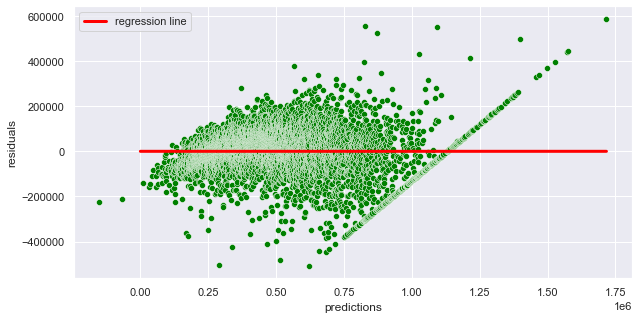

In [100]:
sns.scatterplot(x = 'predictions',y = 'residuals',data = residual_table,color = 'green')
sns.lineplot(x = z, y= k ,color = 'red',linewidth = 3,label = 'regression line')
plt.legend()

# # Distribution of errors


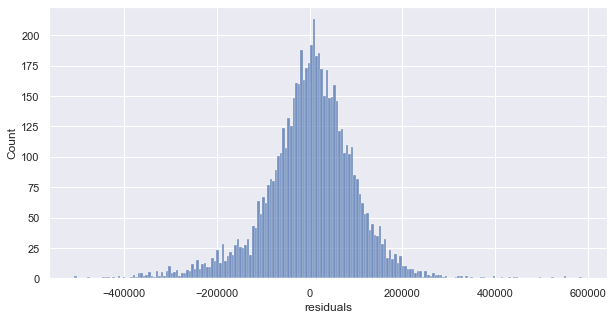

In [101]:
sns.histplot(x = 'residuals',bins = 200,data = residual_table)
sns.set(rc = {'figure.figsize':(10,10)})

# Model coefficients

In [102]:
coefficients_table = pd.DataFrame({'columns': x_train.columns,
                                   'coefficients':lr.coef_})
coefficients_table = coefficients_table.sort_values('coefficients',ascending = False)

<AxesSubplot:xlabel='coefficients', ylabel='columns'>

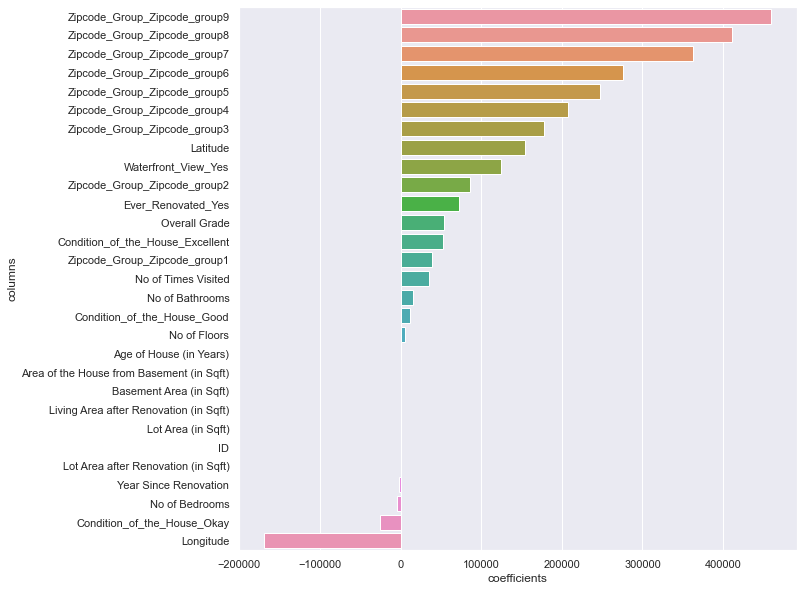

In [103]:
sns.barplot(y = 'columns' , x = 'coefficients',data = coefficients_table,orient='h')